In [ ]:
#Import Libraries and Load the Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
df = pd.read_csv('./Cancer_Data.csv')
# Display the first few rows of the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# To get all column names
df.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

col Unnamed: 32 contain all NaN. This could be removed from dataset

In [ ]:
# Get the number of columns
df.shape[1]

33

In [ ]:
# To check if there are any missing values in each column
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


No missing value in dataset

In [ ]:
# Find duplicate rows (returns a boolean series indicating whether each row is a duplicate)
duplicates = df.duplicated()

# Count the number of duplicate rows
df.duplicated().sum()

0

No duplicates found in the dataset

In [ ]:
# Check the data types of the columns
df.dtypes


,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


 In this dataset there is only one categorial variable "diagnosis". The rest of the columns are numerical variables.

In [ ]:
# Get the unique values in the 'diagnosis' column
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

This shows distinct values present in the diagnosis column, helping us to understand the categories (such as 'M' for Malignant and 'B' for Benign).

In [ ]:
# Display the first few rows of the dataset for further explotation of dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# checked Cloumn "Unnamed: 32" to see whether it has any meaning full data
df['Unnamed: 32'].unique()

array([nan])

Column "Unnamed: 32" contains only missing values (NaN) throughout the dataset. In this case, the column has no meaningful data and can be safely dropped from the DataFrame.

In [ ]:
# Get summary statistics (mean, min, max, etc.) for numerical columns to check data distribution
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


<Figure size 2000x1500 with 0 Axes>

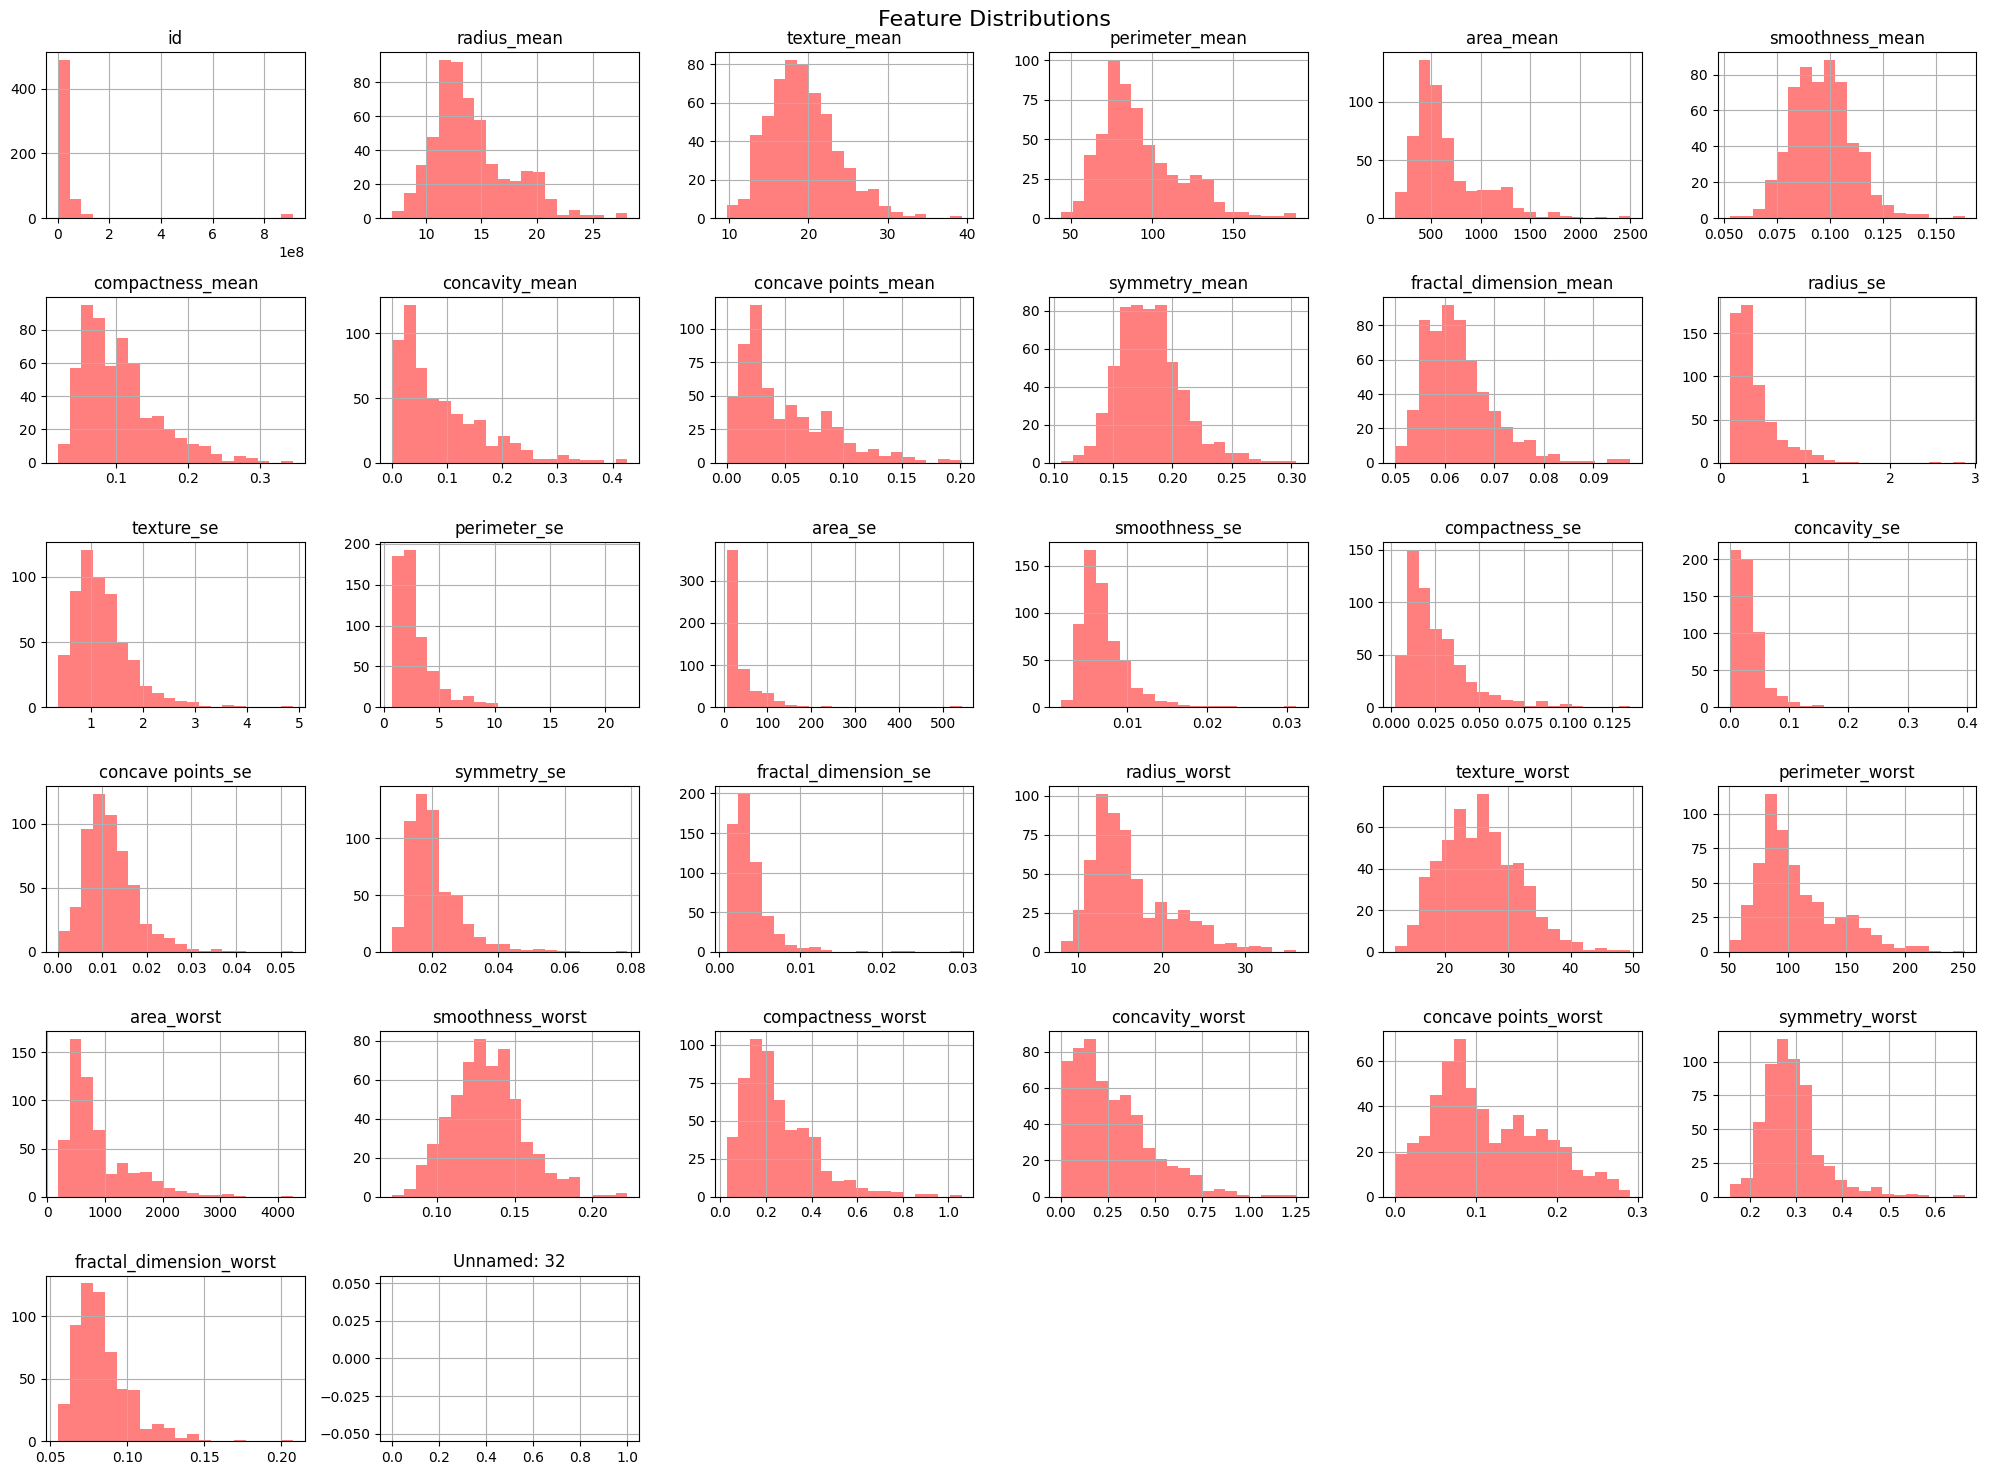

In [ ]:
#Check Feature Distributions.

# Plot distributions for malignant cases
plt.figure(figsize=(20, 15))
df.drop(columns=['diagnosis']).hist(bins=20, color='red', alpha=0.5, figsize=(20, 15))
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

Skewness can often be identified by looking at the histograms of the features.According to above grapgh right skewness can be observed for some features. Since some models are sentive to skewness and outliers this should be handled before splitting the data to train and test.  

# Data cleaning and Feature Engineering

In [ ]:
#The column "Unnamed: 32" is unnecessary for the analysis because it does not contain any information.
#Additionally, the ID column is generally not necessary for modeling in machine learning because it does not provide any meaningful information for the prediction task.

# Drop 'Unnamed: 32' and 'id' columns since they are not useful
df_cleaned = df.drop(columns=['Unnamed: 32', 'id'])

# Check the data types of the columns
df_cleaned.head(5)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Diagnosis coloumn is objective. Convert this column to numerical values
df_cleaned['diagnosis'] = df_cleaned['diagnosis'].map({'M': 1, 'B': 0})

# Split the data into malignant and benign cases
df_malignant = df_cleaned[df_cleaned['diagnosis'] == 1]
df_benign = df_cleaned[df_cleaned['diagnosis'] == 0]

df_cleaned.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# To get summary statistics (mean, min, max, etc.) for numerical columns
df_cleaned.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Check skewness of all features
df_cleaned.skew()

,0
diagnosis,0.528461
radius_mean,0.942380
texture_mean,0.650450
perimeter_mean,0.990650
area_mean,1.645732
smoothness_mean,0.456324
compactness_mean,1.190123
concavity_mean,1.401180
concave points_mean,1.171180
symmetry_mean,0.725609


How to Decide Which Features to Transform:
High skewness values (greater than 1 or less than -1) indicate that a feature should be transformed.
Mild skewness (between -1 and 1) may not require transformation, but you can still experiment if needed. Based on the skewness values we considered transforming the following highly skewed features:

area_se (skewness = 5.45)
concavity_se (skewness = 5.11)
perimeter_se (skewness = 3.44)
radius_se (skewness = 3.09)
fractal_dimension_se (skewness = 3.92)


In [ ]:
# Features to transform based on high skewness
features_to_transform = ['area_se', 'concavity_se', 'perimeter_se', 'radius_se', 'fractal_dimension_se']

# Apply log1p (log(1 + x)) transformation
for feature in features_to_transform:
    df_cleaned[feature + '_log'] = np.log1p(df_cleaned[feature])
clean_columns = [f'{feature}_log' for feature in features_to_transform if not df_cleaned.assign(**{f'{feature}_log': np.log1p(df_cleaned[feature])}).empty]

In [ ]:

# Check skewness of the new log-transformed columns
df_cleaned[clean_columns].skew()

,0
area_se_log,0.847298
concavity_se_log,4.231738
perimeter_se_log,1.025375
radius_se_log,1.713417
fractal_dimension_se_log,3.874373


In [ ]:
df_cleaned.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,area_se_log,concavity_se_log,perimeter_se_log,radius_se_log,fractal_dimension_se_log
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.6656,0.7119,0.2654,0.4601,0.11890,5.039547,0.052336,2.260617,0.739554,0.006174
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.1866,0.2416,0.1860,0.2750,0.08902,4.318554,0.018429,1.481150,0.434053,0.003526
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.4245,0.4504,0.2430,0.3613,0.08758,4.554193,0.037604,1.720084,0.557098,0.004561
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.8663,0.6869,0.2575,0.6638,0.17300,3.340385,0.055066,1.491780,0.402527,0.009166
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.2050,0.4000,0.1625,0.2364,0.07678,4.558498,0.055321,1.862218,0.563722,0.005102


In [ ]:
# List of the original columns to be removed
columns_to_drop = features_to_transform  # These are the original columns before the log transformation

# Drop the original columns from the DataFrame
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Check the DataFrame to ensure columns have been removed
df_cleaned

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,area_se_log,concavity_se_log,perimeter_se_log,radius_se_log,fractal_dimension_se_log
0,1,17.99,10.38,122.800000,1001.00000,0.11840,0.27760,0.30010,0.14710,0.2419,...,0.66560,0.7119,0.2654,0.4601,0.11890,5.039547,0.052336,2.260617,0.739554,0.006174
1,1,20.57,17.77,132.900000,1326.00000,0.08474,0.07864,0.08690,0.07017,0.1812,...,0.18660,0.2416,0.1860,0.2750,0.08902,4.318554,0.018429,1.481150,0.434053,0.003526
2,1,19.69,21.25,130.000000,1203.00000,0.10960,0.15990,0.19740,0.12790,0.2069,...,0.42450,0.4504,0.2430,0.3613,0.08758,4.554193,0.037604,1.720084,0.557098,0.004561
3,1,11.42,20.38,77.580000,386.10000,0.14250,0.28390,0.24140,0.10520,0.2597,...,0.86630,0.6869,0.2575,0.6638,0.17300,3.340385,0.055066,1.491780,0.402527,0.009166
4,1,20.29,14.34,135.100000,1297.00000,0.10030,0.13280,0.19800,0.10430,0.1809,...,0.20500,0.4000,0.1625,0.2364,0.07678,4.558498,0.055321,1.862218,0.563722,0.005102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.000000,1479.00000,0.11100,0.11590,0.24390,0.13890,0.1726,...,0.21130,0.4107,0.2216,0.2060,0.07115,5.073297,0.050674,2.160215,0.777488,0.004230
565,1,20.13,28.25,131.200000,1261.00000,0.09780,0.10340,0.14400,0.09791,0.1752,...,0.19220,0.3215,0.1628,0.2572,0.06637,4.605570,0.038740,1.825033,0.568434,0.002495
566,1,16.60,28.08,108.300000,858.10000,0.08455,0.10230,0.09251,0.05302,0.1590,...,0.30940,0.3403,0.1418,0.2218,0.07820,3.902982,0.046215,1.487270,0.375968,0.003884
567,1,20.60,29.33,140.100000,1265.00000,0.11780,0.27700,0.35140,0.15200,0.2397,...,0.86810,0.9387,0.2650,0.4087,0.12400,4.468434,0.068752,1.912796,0.545807,0.006166


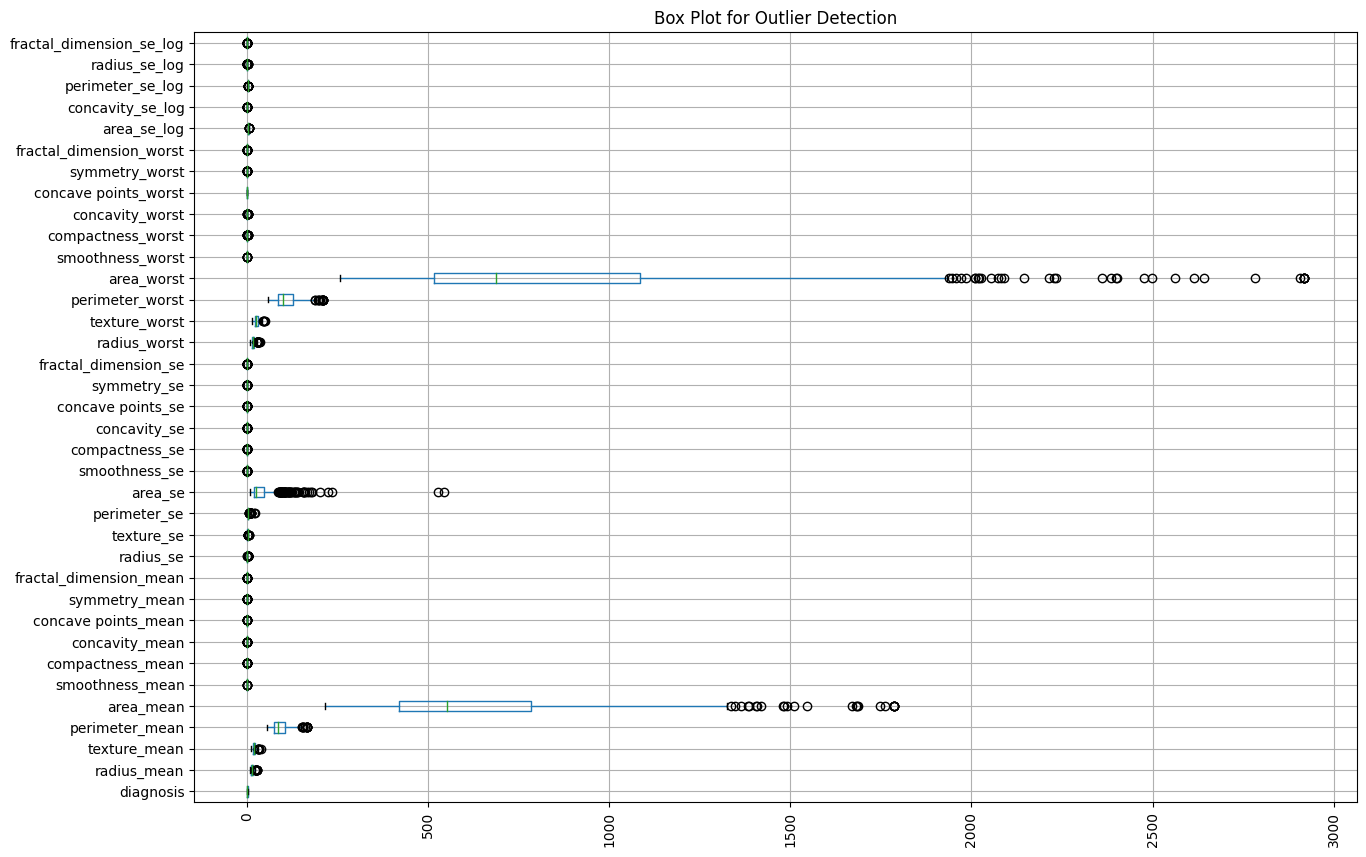

In [ ]:
# check outliers and remove or cap.
# Create boxplots for all the numerical features to detect outliers
df_cleaned.boxplot(figsize=(15, 10), vert=False)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title("Box Plot for Outlier Detection")
plt.show()

Features that has major Outliers are
area_worst
perimeter_worst
area_mean
perimeter_mean

We capped these outliers by replacing values outside the 1st and 99th percentiles with the values at those percentiles.


In [ ]:
# Define the features that have major outliers
features_with_outliers = ['area_worst', 'perimeter_worst', 'area_mean', 'perimeter_mean']

# Cap outliers at 1st and 99th percentiles
for feature in features_with_outliers:
    lower_cap = df_cleaned[feature].quantile(0.01)  # 1st percentile
    upper_cap = df_cleaned[feature].quantile(0.99)  # 99th percentile

    # Cap the values in the original DataFrame
    df_cleaned[feature] = df_cleaned[feature].clip(lower=lower_cap, upper=upper_cap)

# Check the data after capping outliers
df_cleaned[features_with_outliers].describe()

,area_worst,perimeter_worst,area_mean,perimeter_mean
count,569.000000,569.000000,569.000000,569.000000
mean,876.008211,107.122576,651.151358,91.890046
std,547.655023,32.986570,334.291521,23.744842
min,258.237440,58.331328,219.428480,54.006032
25%,515.300000,84.110000,420.300000,75.170000
50%,686.500000,97.660000,551.100000,86.240000
75%,1084.000000,125.400000,782.700000,104.100000
max,2909.891200,207.281280,1769.192000,165.571680


Use this cleaned data to pplit into Training and Test Sets, scaling and training using different models.

In [ ]:
df_cleaned.skew()

,0
diagnosis,0.528461
radius_mean,0.942380
texture_mean,0.650450
perimeter_mean,0.886565
area_mean,1.284137
smoothness_mean,0.456324
compactness_mean,1.190123
concavity_mean,1.401180
concave points_mean,1.171180
symmetry_mean,0.725609


## Buid random forest modle With sclaing the data
### Split data into training and testing
X = df_cleaned.drop('diagnosis', axis=1)  # Features
y = df_cleaned['diagnosis']             
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)
### Predict and evaluate
y_pred_scaled = clf.predict(X_test_scaled)
print("With Scaling:")
print(classification_report(y_test, y_pred_scaled))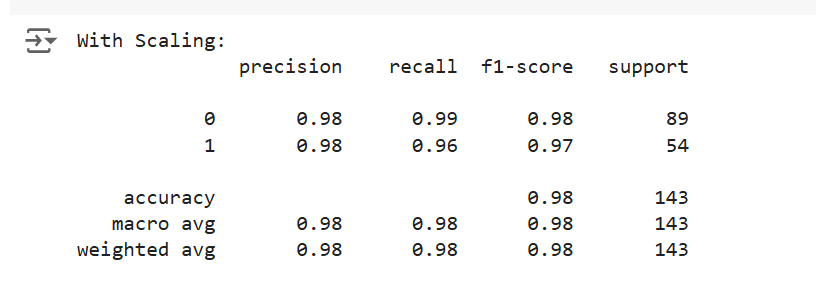

In [ ]:
# Here is the other comparation without sclaing the data
#Split data into training and testing
X = df_cleaned.drop('diagnosis', axis=1)  # Features
y = df_cleaned['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
#Train the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Predict on the test set
y_pred = clf.predict(X_test)

In [ ]:
#Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        89
           1       0.98      0.96      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [ ]:
# Model Accuracy
print('Test Acc: %.3f' % clf.score(X_test, y_test))

Test Acc: 0.979


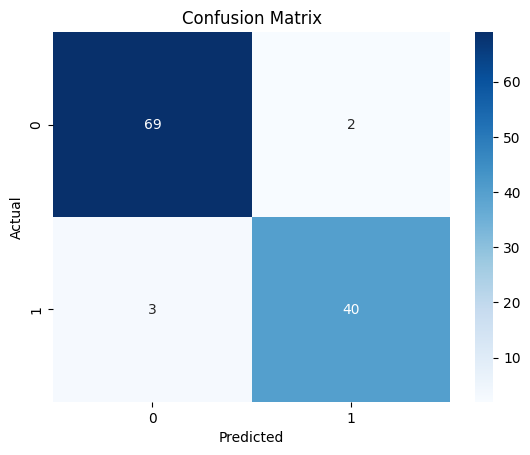

In [ ]:
from sklearn.metrics import confusion_matrix
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

This matrix shows strong performance with high TNs and TPs, indicating the model's predictions are largely accurate. The low FNs and FPs suggest few misclassifications, underscoring the model’s precision and recall.

In [ ]:
importances = clf.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)


In [ ]:
# Print feature importances
print(forest_importances)

radius_mean                 0.062102
texture_mean                0.012226
perimeter_mean              0.055756
area_mean                   0.034133
smoothness_mean             0.004790
compactness_mean            0.019391
concavity_mean              0.043038
concave points_mean         0.118637
symmetry_mean               0.004703
fractal_dimension_mean      0.003091
radius_se                   0.007308
texture_se                  0.003515
perimeter_se                0.010207
area_se                     0.027734
smoothness_se               0.004817
compactness_se              0.004074
concavity_se                0.005922
concave points_se           0.002804
symmetry_se                 0.005296
fractal_dimension_se        0.004531
radius_worst                0.067642
texture_worst               0.017475
perimeter_worst             0.095497
area_worst                  0.092700
smoothness_worst            0.012576
compactness_worst           0.011138
concavity_worst             0.047609
c

<ipython-input-52-c7062cd59315>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


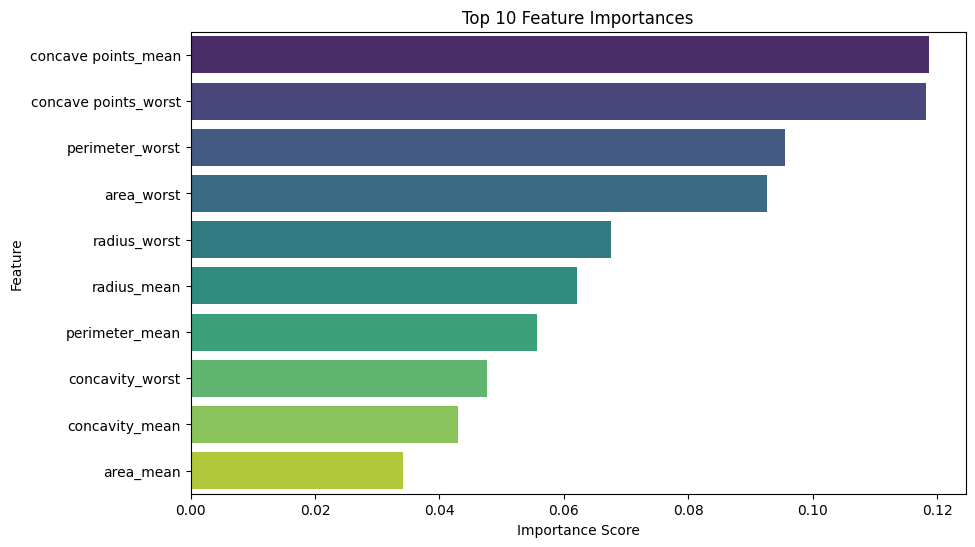

In [ ]:
# Get top 10 features
top_features = forest_importances.nlargest(10)
import matplotlib.pyplot as plt
import seaborn as sns
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()

In [ ]:
# Optimize with the top 10 features
top_features_index = forest_importances.nlargest(10).index
# Create a new DataFrame with only the top 10 features
df_top_features = df_cleaned[top_features_index].copy()
df_top_features['diagnosis'] = y_top_feture
df_top_features

,concave points_mean,concave points_worst,perimeter_worst,area_worst,radius_worst,radius_mean,perimeter_mean,concavity_worst,concavity_mean,area_mean,diagnosis
0,0.14710,0.2654,184.60,2019.0,25.380,17.99,122.800000,0.7119,0.30010,1001.00000,1
1,0.07017,0.1860,158.80,1956.0,24.990,20.57,132.900000,0.2416,0.08690,1326.00000,1
2,0.12790,0.2430,152.50,1709.0,23.570,19.69,130.000000,0.4504,0.19740,1203.00000,1
3,0.10520,0.2575,98.87,567.7,14.910,11.42,77.580000,0.6869,0.24140,386.10000,1
4,0.10430,0.1625,152.20,1575.0,22.540,20.29,135.100000,0.4000,0.19800,1297.00000,1
...,...,...,...,...,...,...,...,...,...,...,...
564,0.13890,0.2216,166.10,2027.0,25.450,21.56,142.000000,0.4107,0.24390,1479.00000,1
565,0.09791,0.1628,155.00,1731.0,23.690,20.13,131.200000,0.3215,0.14400,1261.00000,1
566,0.05302,0.1418,126.70,1124.0,18.980,16.60,108.300000,0.3403,0.09251,858.10000,1
567,0.15200,0.2650,184.60,1821.0,25.740,20.60,140.100000,0.9387,0.35140,1265.00000,1


In [ ]:
features = df_top_features.drop(columns=['diagnosis'])
target = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# Model Accuracy
print('Test Acc: %.3f' % clf.score(X_test, y_test))



Test Acc: 0.956


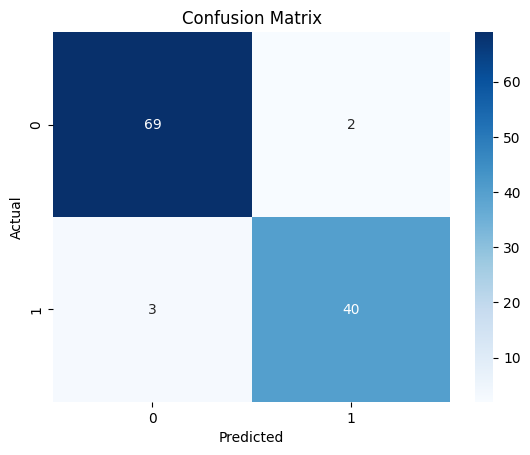

In [ ]:
from sklearn.metrics import confusion_matrix
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()